In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import stats

In [146]:
# Recibe un dataframe de datos de la planta y la variable a analizar

def soldiario(datos,variable = 'Insolacion [W/m2]'):
    fechas = datos['Fecha'].unique()
    solxdia = []
    for i in range(len(fechas)):
        solxdia.append(datos[datos['Fecha']==fechas[i]].sum()[variable]/12 )
    df = {'Dia':fechas, variable:solxdia}
    df = pd.DataFrame(df)
    return df

In [124]:
archivos = glob.glob('*.csv')
archivos

['Abril 2020.csv',
 'Agosto 2020.csv',
 'Diciembre 2019.csv',
 'Diciembre 2020.csv',
 'Enero 2020.csv',
 'Febrero 2020.csv',
 'Julio 2020.csv',
 'Junio 2020.csv',
 'Marzo 2020.csv',
 'Mayo 2020.csv',
 'Noviembre 2019.csv',
 'Noviembre 2020.csv',
 'Octubre 2019.csv',
 'Octubre 2020.csv',
 'Septiembre 2020.csv']

In [133]:
archivos[0].split('.')

['Abril 2020', 'csv']

In [152]:
i=0
variable = 'Insolacion [W/m2]'
#variable = 'Potencia [kW]'

for arch in archivos:
    df = pd.read_csv(arch)
    df = df.drop('Unnamed: 0',axis=1)
    df = df.dropna()
    
    name = arch.split('.') 
    name = name[0].split(' ')
    
    globals()[name[0] + name[1]] = soldiario(df,variable)
    
    if i == 0:
        todo = globals()[name[0] + name[1]] # DataFrame donde se guardan los diferentes valores de insolación por día.
    else:
        todo = pd.concat([todo , globals()[name[0] + name[1]]],axis = 0)
    i+=1

In [153]:
inso_max = todo[variable].max()
inso_min = todo[variable].min()

intervalos = np.linspace(inso_min, inso_max, 15)
print(intervalos)

[1053.07333333 1442.5160119  1831.95869048 2221.40136905 2610.84404762
 3000.28672619 3389.72940476 3779.17208333 4168.6147619  4558.05744048
 4947.50011905 5336.94279762 5726.38547619 6115.82815476 6505.27083333]


## Histograma de insolación media diaria

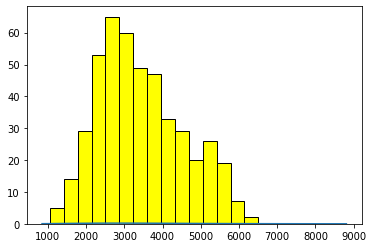

In [221]:
plt.figure()
plt.hist(todo['Insolacion [W/m2]'],15,color = 'yellow',ec = 'k') #Histograma de frecuencias de insolación diaria media
#plt.hold(True)
# Graficando Gamma
a = 4.5 # parametro de forma.
gamma = stats.gamma(a)
x = np.linspace(gamma.ppf(0.01),
                gamma.ppf(0.99), 100)
fp = gamma.pdf(x) # Función de Probabilidad
plt.plot(x*todo['Insolacion [W/m2]'].max()/8, fp)
plt.show()

(array([ 5., 14., 29., 53., 65., 60., 49., 47., 33., 29., 20., 26., 19.,
         7.,  2.]),
 array([1053.07333333, 1416.55316667, 1780.033     , 2143.51283333,
        2506.99266667, 2870.4725    , 3233.95233333, 3597.43216667,
        3960.912     , 4324.39183333, 4687.87166667, 5051.3515    ,
        5414.83133333, 5778.31116667, 6141.791     , 6505.27083333]),
 <a list of 15 Patch objects>)

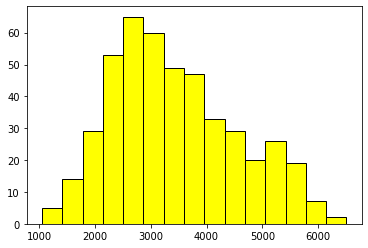

In [228]:
plt.hist(todo['Insolacion [W/m2]'],15,color = 'yellow',ec = 'k')

ValueError: `bins` must increase monotonically, when an array

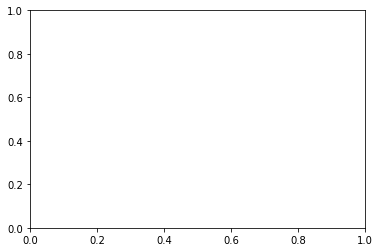